<a href="https://colab.research.google.com/github/Nidhi-Chauhan111/Cats-and-Dogs-images-classification-using-CNN/blob/main/CatsVSDogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Recognition using ANN and CNN

<h3> Steps to recognize images: </h3>

- image acquisition - importing the image and here an image is captured and converted into a format that a computer can process

- pre processing - processing stage of the image, where noise reduction,
- segmentation - partioning the image according to the distinct or similar regions
- feature extraction and selection - lines and edges, corners etc. Deep learning has a feature of automating
feature extraction
- high level processing - image goes through different levels of processing for better precision
- decision making

<h3> ANN : Artificial Neural Network </h3>

- Inspired by the biological structure of brain. It contains components like: layers, neurons, weights and biases.

-  classification, clustering, regression and more can be done using the activation function.

- the output from one layer becomes the input of other layer

- the activation function is applied as per the output we desire. eg: sigmoid for classification.

- forward propagation and backward propagation

- Loss calculation- calcualting Mean Squared error or any other method can be used

- Training: iteration of forward propagation/backward propagation, loss function




#CNN : Convolutional Neural Network

- Advanced version of ANN
- Epoxies are used
- Kernel: filter that is helpful in feature extraction
- Stride
- Pooling: technique for generalising feature extracted by convolutional filters that help the network to recognise features.(Mostly used)
- Flatten:  converts images from 2d to 1d form

<h3>Layers used in CNN:</h3>

- input layers
- pooling
- fully connected layer
- activation function






In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nidhisinghchauhan11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:07<00:00, 145MB/s] 


In [ ]:
train='/content/dogs-vs-cats/train'
test = '/content/dogs-vs-cats/test'

In [ ]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#load training data
train_data = keras.utils.image_dataset_from_directory(
    directory=train,
    labels="inferred", #folder name cats, dogs #will check the folders from the directories
    label_mode="int",  #0,1
    batch_size = 32,
    image_size=(256,256) #resize
)
test_data = keras.utils.image_dataset_from_directory(
    directory=test,
    labels="inferred", #folder name cats, dogs
    label_mode="int",  #0,1
    batch_size = 32,
    image_size=(256,256) #resize
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalization
def process(image,label):
  image=tf.cast(image/255.0,tf.float32)
  return image,label

  train_data=train_data.map(process)
  test_data=test_data.map(process)

In [ ]:
# create model
#firstly use the sequential model...works layer by layer
model = Sequential()
#1st processing
#conv2d: extract feature line edge pattern
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu", input_shape=(256,256,3)))
#maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#2nd processing
#conv2d: extract feature line edge pattern
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu", input_shape=(256,256,3)))
#maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#3rd processing
#conv2d: extract feature line edge pattern
model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu", input_shape=(256,256,3)))
#maxpooling2d
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

#convert 2d to 1d
model.add(Flatten())

#dense layer with dropout
model.add(Dense(128,activation="relu"))
model.add(Dropout(0,1))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0,1))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_data, epochs=3, validation_data=test_data)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.7543 - loss: 0.4837 - val_accuracy: 0.6096 - val_loss: 0.9066
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.8096 - loss: 0.4100 - val_accuracy: 0.6154 - val_loss: 1.1238
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.8672 - loss: 0.3042 - val_accuracy: 0.6106 - val_loss: 1.4412


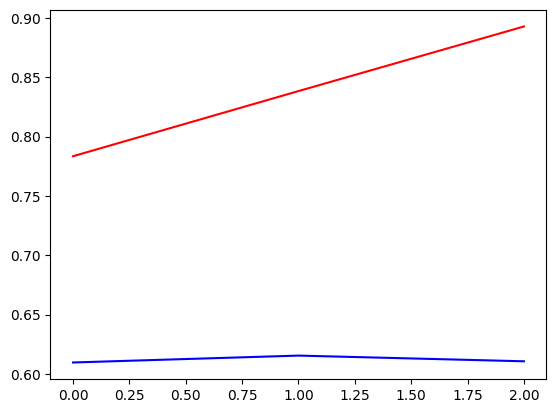

In [ ]:
#plot the accuracy train-test:
plt.plot(history.history["accuracy"], color ="red",label="train")
plt.plot(history.history["val_accuracy"], color ="blue",label="test")

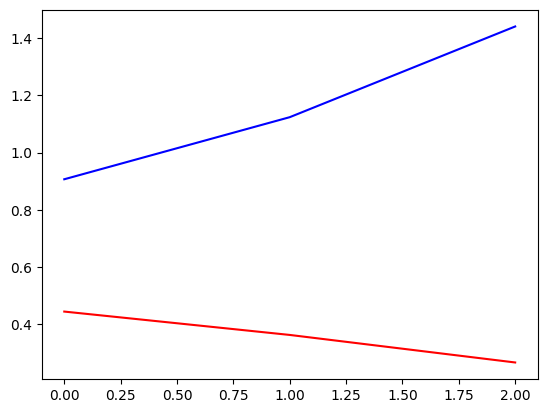

In [ ]:
plt.plot(history.history["loss"], color ="red",label="train")
plt.plot(history.history["val_loss"], color ="blue",label="test")

In [ ]:
#user input prediction
img_path="/content/dogs-vs-cats/dogs_vs_cats/train/cats/cat.0.jpg"
img=keras.utils.load_img(img_path, target_size=(256,256))
#convert to array
img_array=keras.utils.img_to_array(img)

#normalize
img_array=img_array/255.0

#expand dims to convert to batch shape
img_array=np.expand_dims(img_array,axis=0)

prob = model.predict(img_array)[0][0]
print(f"probability: {prob}")

Pred_class=1 if prob>0.5 else 0
print(f"Predicted class: {Pred_class}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
probability: 0.006644634064286947
Predicted class: 0


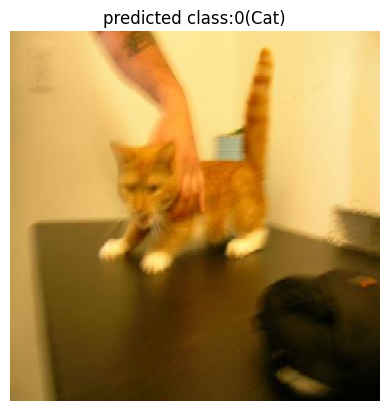

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.title(f'predicted class:{Pred_class}({"Dog" if Pred_class==1 else "Cat"})')
plt.show()

In [ ]:
model.save("catvsdog.h5")